# Analysis of Antibiotics Prescription and Hospitalisation Risk

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import os
import glob
%matplotlib inline

In [52]:
#read csv.gz files and concatenate them
path1 = os.getcwd()+'\output\measures'
all_files = glob.glob(os.path.join(path1, "*.csv.gz"))
print(path1)

data = pd.concat((pd.read_csv(f) for f in all_files))
data

c:\Users\m84300af\OneDrive - The University of Manchester\Documents\GitHub\amr-uom-brit\output\measures


,bmi_date_measured,smoking_status_date,most_recent_unclear_smoking_cat_date,flu_vaccine_med,flu_vaccine_clinical,sgss_positive,covrx1_dat,covrx2_dat,died_date,uti_date_1,...,lrti_counts,uti_ab_count_1,uti_ab_count_2,uti_ab_count_3,uti_ab_count_4,lrti_ab_count_1,lrti_ab_count_2,lrti_ab_count_3,lrti_ab_count_4,patient_id
0,2019-06,NaN,NaN,NaN,NaN,2021-06-22,NaN,NaN,NaN,NaN,...,5,5,0,0,0,0,0,0,6,2902
1,2016-01,NaN,NaN,NaN,NaN,2021-06-15,NaN,NaN,NaN,NaN,...,0,0,0,0,5,0,4,0,0,6272
2,2017-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,5,0,905
3,2010-02,NaN,NaN,2018-10,NaN,NaN,NaN,NaN,NaN,NaN,...,0,4,0,0,0,0,0,0,0,6369
4,2018-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,0,0,0,6,4,0,0,0,414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2011-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,4,0,0,0,0,0,1535
996,2015-08,2021-06,2020-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,5,0,4,0,7986
997,2017-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,3,0,0,0,4020
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-04,...,4,4,3,0,0,0,0,0,0,4409


In [53]:
data.columns

Index(['bmi_date_measured', 'smoking_status_date',
       'most_recent_unclear_smoking_cat_date', 'flu_vaccine_med',
       'flu_vaccine_clinical', 'sgss_positive', 'covrx1_dat', 'covrx2_dat',
       'died_date', 'uti_date_1', 'uti_date_2', 'uti_date_3', 'uti_date_4',
       'lrti_date_1', 'lrti_date_2', 'lrti_date_3', 'lrti_date_4', 'age',
       'age_cat', 'sex', 'practice', 'region', 'msoa', 'imd', 'bmi',
       'ethnicity', 'smoking_status', 'gp_count', 'flu_vaccine_tpp',
       'flu_vaccine', 'antibacterial_prescriptions',
       'broad_spectrum_antibiotics_prescriptions', 'primary_care_covid',
       'admitted', 'uti_counts', 'lrti_counts', 'uti_ab_count_1',
       'uti_ab_count_2', 'uti_ab_count_3', 'uti_ab_count_4', 'lrti_ab_count_1',
       'lrti_ab_count_2', 'lrti_ab_count_3', 'lrti_ab_count_4', 'patient_id'],
      dtype='object')

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   bmi_date_measured                         27234 non-null  object 
 1   smoking_status_date                       3400 non-null   object 
 2   most_recent_unclear_smoking_cat_date      3400 non-null   object 
 3   flu_vaccine_med                           3400 non-null   object 
 4   flu_vaccine_clinical                      3400 non-null   object 
 5   sgss_positive                             3400 non-null   object 
 6   covrx1_dat                                0 non-null      float64
 7   covrx2_dat                                0 non-null      float64
 8   died_date                                 3400 non-null   object 
 9   uti_date_1                                3400 non-null   object 
 10  uti_date_2                          

In [55]:
data.describe(include='all')

,bmi_date_measured,smoking_status_date,most_recent_unclear_smoking_cat_date,flu_vaccine_med,flu_vaccine_clinical,sgss_positive,covrx1_dat,covrx2_dat,died_date,uti_date_1,...,lrti_counts,uti_ab_count_1,uti_ab_count_2,uti_ab_count_3,uti_ab_count_4,lrti_ab_count_1,lrti_ab_count_2,lrti_ab_count_3,lrti_ab_count_4,patient_id
count,27234,3400,3400,3400,3400,3400,0.0,0.0,3400,3400,...,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000
unique,141,34,34,13,7,979,NaN,NaN,416,980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-08,2020-06,2019-05,2018-08,2018-07,2019-02-04,NaN,NaN,2021-10-06,2021-05-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,241,126,124,314,579,10,NaN,NaN,40,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.899000,0.902853,0.898382,0.899294,0.897824,0.898882,0.899382,0.901882,0.894206,5027.367853
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.856567,1.865205,1.856652,1.857977,1.855647,1.858271,1.857926,1.863174,1.848719,2893.934196
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2507.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5064.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7525.000000


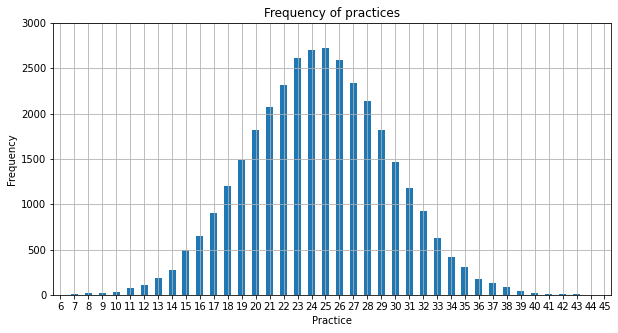

In [56]:
#data['practice'].value_counts().sort_index()

data['practice'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), rot=0)
plt.xlabel('Practice')
plt.ylabel('Frequency')
plt.title('Frequency of practices')
#plt.xlim(0, 100)
plt.ylim(0, 3000)
plt.grid()
plt.savefig(r'output/hospitalisation_risk/practices.png', edgecolor='none')
plt.show()

F    17321
M    16679
Name: sex, dtype: int64


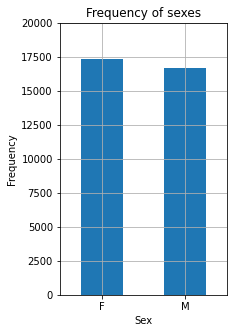

In [57]:
#data['sex'].value_counts().sort_index()

data['sex'].value_counts().sort_index().plot(kind='bar', figsize=(3, 5), rot=0)
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Frequency of sexes')
#plt.xlim(0, 100)
plt.ylim(0, 20000)
plt.grid()
print(data['sex'].value_counts().sort_index())
plt.savefig(r'output/hospitalisation_risk/sexes.png', edgecolor='none')
plt.show()

0-4      4007
15-24    3729
25-34    3779
35-44    3766
45-54    3738
5-14     3664
55-64    3753
65-74    3759
75+      3805
Name: age_cat, dtype: int64


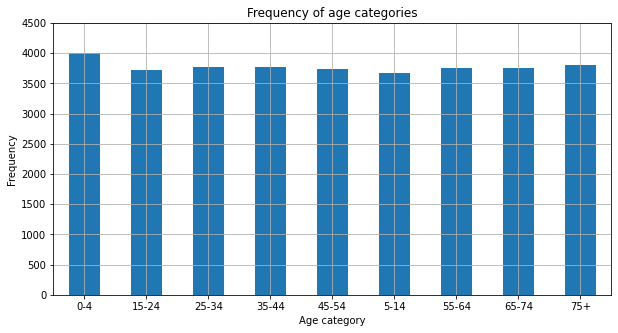

In [58]:
#data['age_cat'].value_counts().sort_index()

data['age_cat'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), rot=0)
plt.xlabel('Age category')
plt.ylabel('Frequency')
plt.title('Frequency of age categories')
#plt.xlim(0, 100)
plt.ylim(0, 4500)
plt.grid()
print(data['age_cat'].value_counts().sort_index())
plt.savefig(r'output/hospitalisation_risk/age_categories.png', edgecolor='none')
plt.show()

C:\Users\m84300af\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


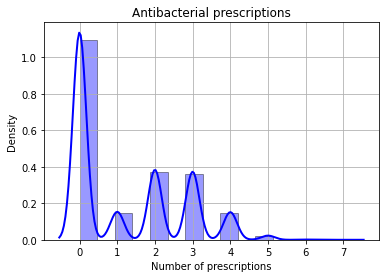

In [59]:
sns.distplot(data['antibacterial_prescriptions'], hist=True, kde=True, 
             bins=15, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

plt.xlabel('Number of prescriptions')
#plt.ylabel('Frequency')
plt.title('Antibacterial prescriptions')
#plt.xlim(0, 100)
#plt.ylim(0, 1100)
plt.grid(True)
plt.savefig(r'output/hospitalisation_risk/antibacterial_prescirption.png', edgecolor='none')
plt.show()